In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import fsolve

In [3]:
class system_parameters:
    def __init__(self,vrad,k,r_star,r_planet,period,inclination,semi,rotation):
        #Taking inputs and initializing the required parameters for plotting the radial velocity curve for the star.
        self.v0= vrad
        self.k_star= k
        self.r_s= r_star
        self.r_p= r_planet
        self.P=period
        self.i=inclination
        self.a= semi
        self.i_star=90
        self.vrot= rotation
        self.Delta()
        self.total_time()
        self.time_f()
        self.impact()
        
    def Delta(self):
        #Function to calculate delta
        self.delta= (self.r_p/self.r_s)**2
        
    def total_time(self):
        #Function to calculate the ratio of transit time to period
        self.t_T= ((self.P/np.pi*(self.r_s/self.a))*np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2))/self.P
        
    def time_f(self):
        #Function to calculate t_f/P 
        self.t_f=self.t_T*np.sqrt((1-self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)/np.sqrt((1+self.delta)**2-(self.a*np.cos(np.deg2rad(self.i))/self.r_s)**2)
    
    def impact(self):
        #Function to calculate b
        self.b= (self.a/self.r_s)*np.cos(np.deg2rad(self.i))
        
    def radvel(self):
        #for circular orbits
        t= np.linspace(0,1,100000)
        #the basic sinusoidal radial velocity variation due to Keplers law
        v= self.v0 + (self.k_star*np.sin(2*np.pi*t))*np.sin(np.deg2rad(self.i))
        arr=np.array(v)
        
        #Adding the Rossiter- McLaughlin Effect
        a_rm= 1/3* self.delta*self.vrot*np.sin(np.deg2rad(self.i_star))*np.sqrt(1-(self.b)**2)
        v1=np.zeros(100000)
        for i in range(len(t)):
            if ((0.5-self.t_f/2)<t[i]<(0.5+self.t_f/2)):
                v1[i]= a_rm*np.cos((np.pi*(2*t[i]-1+self.t_f))/(2*self.t_f))
        
        #Adding the two radial velocity arrays
        rv= v+v1
        
        #Plotting
        fig=plt.figure()
        ax1= fig.add_subplot(2,1,1)
        ax2= fig.add_subplot(2,1,2)
        
        ax1.plot(t,rv)
        ax1.set_xlabel("t/P")
        ax1.set_ylabel("v_star (m/s)")
        ax1.set_title("Rossiter-McLaughlin Effect")
        
        ax2.plot(t,rv)
        ax2.set_xlabel("t/P")
        ax2.set_ylabel("v_star (m/s)")
        ax2.set_xlim(0.5-self.t_f,0.5+self.t_f)
        


In [4]:
#Using the parameters for Jupiter and the Sun.
Sun=system_parameters(0,12,1,0.1,12,90,1113.9,2000)

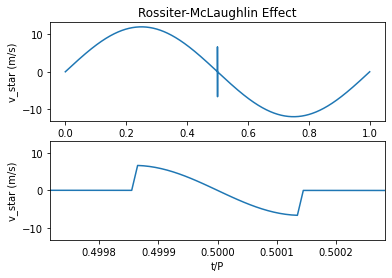

In [5]:
Sun.radvel()

In [6]:
def e_angle(E,t,e):
    #Function to calculate the roots of the transcendental equation. To get E
    return E- e*np.sin(E)- 2*np.pi*t

In [7]:
def true_anomaly(f,E,e):
    #Function to calculate the true anomaly given the eccentric anomaly
    temp= np.sqrt((1+e)/(1-e))
    return np.tan(f/2)- temp*np.tan(E/2)

In [20]:
def eradvel(system):
    #function to plot the radial velocity curve for elliptical orbits. omega star=3pi/2
    e=0.3
    
    t= np.linspace(0,1,100000)
    f=[] #array to store the true anomalies
    for i in range(len(t)):
        estimate= 2*np.pi*t[i]
        E= fsolve(e_angle, estimate, args=(t[i],e))
        f.append(fsolve(true_anomaly, estimate, args=(E, e)))
        
    anomaly=np.array(f)
    v= system.v0 + (system.k_star*np.sin(f))*np.sin(np.deg2rad(system.i))
    vrad=np.array(v)
    
    plt.plot(t,vrad)

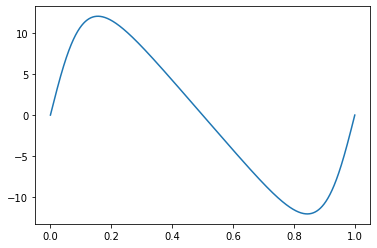

In [21]:
eradvel(Sun)